## Ground Risk Model, Using Harm, Impact, Expsure, and Coridor

Importing common library

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
#Import Online
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
# from upt.utils.geo_utils import line_smoothing as lsp

import matplotlib.pyplot as plt
JakUt = foi('Jakarta Utara',crs=3857,zoom_level=15)
JakUt_building_area = JakUt.area_of_interest({'military':True,'aeroway':True,'building':True,})

C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\libpysal\c

loaded
loaded
loaded gdf



KeyboardInterrupt



In [4]:
from upt.utils.file_handle import FileHandle
fh = FileHandle("7626002_Jakarta Utara")
JakUt_true_area = fh.load_gdf("Jakarta Utara_calculated_military_True",fh.feature_dir)
# JakUt_overlayer = fh.load_gdf("Jakarta Utara_overlay_building_True",fh.feature_dir)

# Path Smoothing and risk retrieval

In [ ]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.file_handle import FileHandle

import matplotlib.pyplot as plt

fh = FileHandle("14525364_Depok")
depok_school = fh.load_gdf("Depok_calculated_amenity_school",fh.feature_dir)

depok_star = AStar(depok_school,'area',crs=depok_school.crs)
depok_path = depok_star.run_instance(3,121212)
way_marker = depok_star.create_line()

from upt.postprocessor.line_smoothing import non_smooth
gpd_proccessed = non_smooth(way_marker, depok_school.crs)

# print(way_marker)


In [20]:
import geopandas as gpd
from shapely.geometry import LineString

line_shape = LineString(way_path)
line_gdf = gpd.GeoDataFrame(geometry=[line_shape])

<AxesSubplot: >

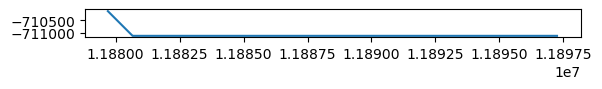

In [2]:
gpd_proccessed

In [23]:
line_gdf.set_crs(depok_school.crs, inplace=True)

,geometry
0,"LINESTRING (11879670.953 -710163.500, 11879709..."


In [26]:
line_sjoin = line_gdf.sjoin(depok_school, how="left" )

<AxesSubplot: >

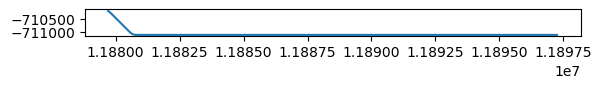

In [30]:
line_gdf.plot()

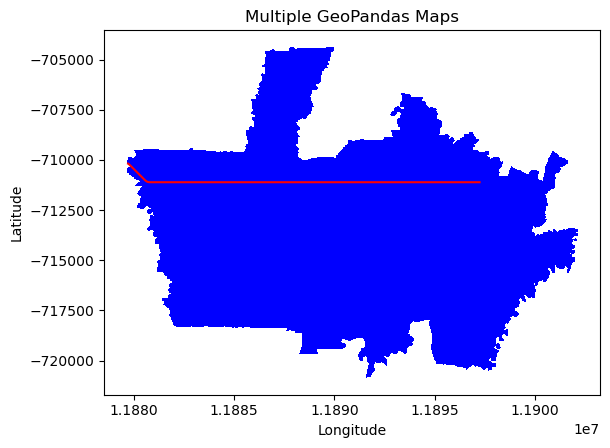

In [39]:
fig, ax = plt.subplots()

# Plot the first map
depok_school.plot(ax=ax, color='blue')

# Plot the second map on top
line_gdf.plot(ax=ax, color='red')

# Set any additional customization options for the plot
ax.set_title('Multiple GeoPandas Maps')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

# Risk Calcualtion

<AxesSubplot: >

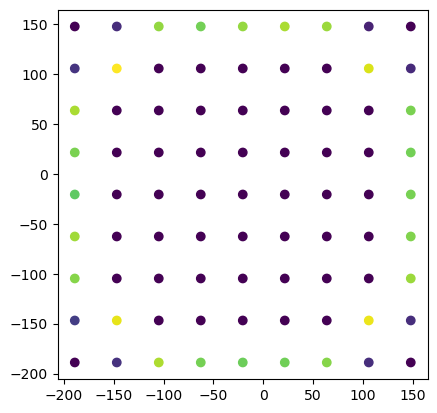

In [16]:
from upt.aircraft.base_impact_model import BaseImpactModel

#Aircraft profile
drone_profile={
    'mass': 1,
    'g': 9.81,
    'cd': 0.02,
    'cl': 0,
    'flight_lv': 400,
    'cruise speed':100
    }

talon = {
    'glide speed':15,
    'glide descent angle' : 20,
    'flight_lv':1,
    'mass':2.1,
}


sample_number = 10000

Ballistic_trajectory = BaseImpactModel("ballistic", drone_profile, JakUt_true_area.crs, sample_number)
ballistic_mask = Ballistic_trajectory.run_model()
ballistic_mask.plot(column="N_points")

In [17]:
ballistic_mask

,N_points,E_imp,geometry
0,0.0000,0.0,POINT (-188.943 -188.943)
1,0.0083,83.0,POINT (-188.943 -146.851)
2,0.0383,383.0,POINT (-188.943 -104.758)
3,0.0403,403.0,POINT (-188.943 -62.666)
4,0.0352,352.0,POINT (-188.943 -20.574)
...,...,...,...
76,0.0373,373.0,POINT (147.795 -20.574)
77,0.0369,369.0,POINT (147.795 21.518)
78,0.0374,374.0,POINT (147.795 63.610)
79,0.0055,55.0,POINT (147.795 105.702)


In [5]:
from upt.riskcalculator.sjoin_mask import sjoin_mask
idx = np.arange(0, JakUt_true_area.shape[0])
risk = sjoin_mask(idx,ballistic_mask,JakUt_true_area)

C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)


KeyError: 'pre fatality'

<AxesSubplot: >

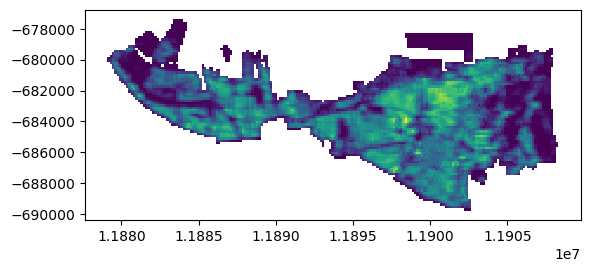

In [6]:
risk.plot(column='risk')

In [6]:
from upt.riskcalculator.sjoin_mask import sjoin_mask
idx = np.arange(0, JakUt_true_area.shape[0])
risk = sjoin_mask(idx,ballistic_mask,JakUt_true_area,"N_points")

C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)


In [9]:
ballistic_mask['N_points'].sum()

1.0

<AxesSubplot: >

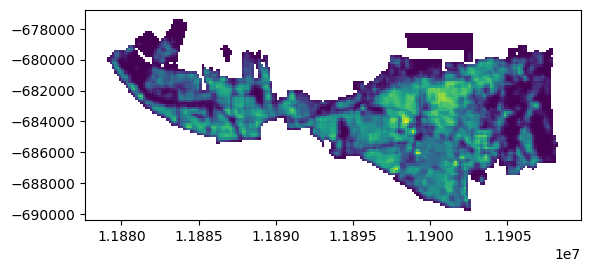

In [9]:
risk.plot(column="risk")

<AxesSubplot: >

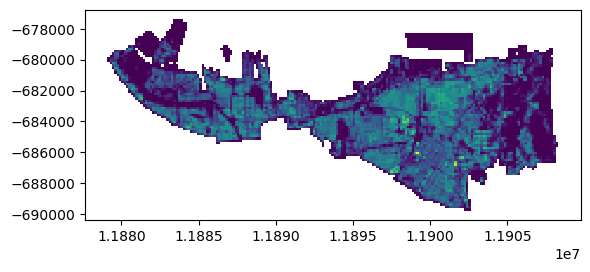

In [12]:
JakUt_true_area.plot("area")

In [22]:
import geopandas as gpd
from scipy.ndimage import gaussian_filter

# Create a sample GeoDataFrame
gdf = JakUt_true_area

# Define the column to be blurred
column_to_blur = 'area'

# Apply Gaussian blur to the column data
gdf[column_to_blur] = gdf[column_to_blur].apply(lambda x: gaussian_filter(x, sigma=4))

# Print the resulting GeoDataFrame

In [26]:
risk

,geometry,quadkey,id,area,shelter factor,height,risk
0,"POLYGON ((11879231.440 -679983.804, 11879231.4...",310012111312023223,0,290.899650,0.25,0.0,349.139841
1,"POLYGON ((11879231.440 -680136.678, 11879231.4...",310012111312201001,1,260.678059,0.25,0.0,589.518683
2,"POLYGON ((11879384.314 -679830.930, 11879384.3...",310012111312023230,2,0.000000,0.00,0.0,531.478334
3,"POLYGON ((11879384.314 -679983.804, 11879384.3...",310012111312023232,3,2007.071476,0.25,0.0,2105.109302
4,"POLYGON ((11879384.314 -680136.678, 11879384.3...",310012111312201010,4,4907.412662,0.25,0.0,2447.466164
...,...,...,...,...,...,...,...
7082,"POLYGON ((11908124.637 -686404.514, 11908124.6...",310013000221002112,7082,0.000000,0.00,0.0,168.807759
7083,"POLYGON ((11908124.637 -686557.388, 11908124.6...",310013000221002130,7083,0.000000,0.00,0.0,98.050988
7084,"POLYGON ((11908124.637 -686710.262, 11908124.6...",310013000221002132,7084,0.000000,0.00,0.0,0.119121
7085,"POLYGON ((11908277.511 -685487.270, 11908277.5...",310013000221000133,7085,391.694238,0.25,0.0,1334.385611


In [24]:
gdf

,geometry,quadkey,id,area,shelter factor,height
0,"POLYGON ((11879231.440 -679983.804, 11879231.4...",310012111312023223,0,290.899650,0.25,0.0
1,"POLYGON ((11879231.440 -680136.678, 11879231.4...",310012111312201001,1,260.678059,0.25,0.0
2,"POLYGON ((11879384.314 -679830.930, 11879384.3...",310012111312023230,2,0.000000,0.00,0.0
3,"POLYGON ((11879384.314 -679983.804, 11879384.3...",310012111312023232,3,2007.071476,0.25,0.0
4,"POLYGON ((11879384.314 -680136.678, 11879384.3...",310012111312201010,4,4907.412662,0.25,0.0
...,...,...,...,...,...,...
7082,"POLYGON ((11908124.637 -686404.514, 11908124.6...",310013000221002112,7082,0.000000,0.00,0.0
7083,"POLYGON ((11908124.637 -686557.388, 11908124.6...",310013000221002130,7083,0.000000,0.00,0.0
7084,"POLYGON ((11908124.637 -686710.262, 11908124.6...",310013000221002132,7084,0.000000,0.00,0.0
7085,"POLYGON ((11908277.511 -685487.270, 11908277.5...",310013000221000133,7085,391.694238,0.25,0.0


# Plotting

In [ ]:
jakarta_utara_area.plot(column='area')

In [ ]:
jakarta_star = AStar(depok_school,'area',crs=depok_school.crs)
jakarta_path = depok_star.run_instance(3,1000)
way_marker = depok_star.create_line()
way_path = lsp(way_marker[:,0],way_marker[:,1],)

ax = jakarta_buildl.plot(column="area",cmap='plasma')
plt.plot(way_path[:,0], way_path[:,1],color='blue')

Using offline data containing footprint area

In [ ]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp
from upt.utils.file_handle import FileHandle

import matplotlib.pyplot as plt

fh = FileHandle("14525364_Depok")
depok_school = fh.load_gdf("Depok_calculated_building_True",fh.feature_dir)

# depok_star = AStar(depok_school,'area',crs=depok_school.crs)
# depok_path = depok_star.run_instance(3,1000)
# way_marker = depok_star.create_line()
# way_path = lsp(way_marker[:,0],way_marker[:,1],)
# # print(way_marker)

# ax = depok_school.plot(column="amenity school_area",cmap='afmhot')
# plt.plot(way_path[:,0], way_path[:,1],color='blue')

In [ ]:
print(f"Number of grid cell available: {depok_school.shape[0]}")
print(f"Average grid cell area(metre): {depok_school['area'].mean()}")
depok_school.head(10)

In [ ]:
depok_school.plot(column="area")

Creating Probability Ballistic Impact Map 

In [ ]:
from upt.aircraft.base_impact_model import BaseImpactModel

In [14]:
#Aircraft profile
drone_profile={
    'mass': 1,
    'g': 9.81,
    'cd': 0.02,
    'cl': 0,
    'flight_lv': 400,
    'diagonal size' : 0.3
    'glide angle' : 12.5
    }

sample_number = 10000

In [ ]:
Ballistic_trajectory = BaseImpactModel("ballistic", drone_profile, depok_school.crs, sample_number)
ballistic_mask = Ballistic_trajectory.run_model()
ballistic_mask.plot(column="N_points")

In [ ]:
    def sjoin_risk_sum(array_index):
        mask_translate = mask.copy()
        mask_translate['geometry'] = mask.translate(gdf.iloc[array_index][0].centroid.x,gdf.iloc[array_index][0].centroid.y)
        sjoin_gp = gpd.sjoin(gdf, mask_translate)
        risk = sjoin_gp['N_points'].multiply(sjoin_gp['area']).sum()
        # risk = sjoin_gp[attr_columns].prod().sum()
        return(risk)

In [ ]:
ballistic_mask_d_translate = ballistic_mask_d.copy()
ballistic_mask_d_translate['geometry'] = ballistic_mask.translate(depok_school.iloc[50][0].centroid.x,depok_school.iloc[50][0].centroid.y)

In [ ]:
gpd.sjoin(depok_school_d, ballistic_mask_d_translate)

In [ ]:
depok_school_d = depok_school.copy()

In [ ]:
depok_school_d['test2'] = 2

In [ ]:
ballistic_mask_d = ballistic_mask.copy()

In [ ]:
ballistic_mask_d['test'] = 1

Applying Probability falling drone map based on School area

In [ ]:
from upt.riskcalculator.sjoin_mask import sjoin_mask
idx = np.arange(0, depok_school.shape[0])
risk = sjoin_mask(idx,ballistic_mask,depok_school,"N_points")

In [ ]:
depok_school['risk'] = risk['risk']

In [ ]:
depok_school.plot(column="risk", cmap="viridis")

why dont i just use gaussian function to do this

In [3]:
import geopandas
import rioxarray
import contextily
import datashader as ds
import matplotlib.pyplot as plt

url = ("https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/GHS_POP_E2030_GLOBE_R2023A_54009_100/V1-0/tiles/GHS_POP_E2030_GLOBE_R2023A_54009_100_V1_0_R10_C29.zip")
p = f"zip+{url}!GHS_POP_E2030_GLOBE_R2023A_54009_100_V1_0_R10_C29.tif"

from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp

z  = foi.p_density(p)

In [4]:
p_dense = foi.pop_join(JakUt_true_area,z)

In [5]:
p_dense

,geometry,quadkey,id,area,shelter factor,no fly zone,height,population
0,"POLYGON ((11880148.684 -679983.804, 11880148.6...",310012111312023,0,63544.754190,0.25,0.0,0.0,0.002250
1,"POLYGON ((11880148.684 -681206.796, 11880148.6...",310012111312201,1,172568.805239,0.25,0.0,0.0,0.002250
2,"POLYGON ((11880148.684 -682429.789, 11880148.6...",310012111312203,2,7929.587671,0.25,0.0,0.0,0.002423
3,"POLYGON ((11881371.677 -678760.811, 11881371.6...",310012111312030,3,0.000000,0.00,0.0,0.0,0.002408
4,"POLYGON ((11881371.677 -679983.804, 11881371.6...",310012111312032,4,70780.829075,0.25,0.0,0.0,0.002219
...,...,...,...,...,...,...,...,...
149,"POLYGON ((11908277.511 -682429.789, 11908277.5...",310013000203202,149,42993.163867,0.25,0.0,0.0,0.002408
150,"POLYGON ((11908277.511 -683652.781, 11908277.5...",310013000203220,150,9709.241292,0.25,0.0,0.0,0.002235
151,"POLYGON ((11908277.511 -684875.773, 11908277.5...",310013000203222,151,47059.200494,0.25,0.0,0.0,0.002392
152,"POLYGON ((11908277.511 -686098.766, 11908277.5...",310013000221000,152,17699.788349,0.25,0.0,0.0,0.002235


In [ ]:
import geopandas
import rioxarray
import contextily
import datashader as ds
import matplotlib.pyplot as plt

url = ("https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/GHS_POP_E2030_GLOBE_R2023A_54009_100/V1-0/tiles/GHS_POP_E2030_GLOBE_R2023A_54009_100_V1_0_R10_C29.zip")
p = f"zip+{url}!GHS_POP_E2030_GLOBE_R2023A_54009_100_V1_0_R10_C29.tif"

j_pop = rioxarray.open_rasterio(p)
j_pop

<xarray.DataArray (band: 1, y: 10000, x: 10000)>
[100000000 values with dtype=float64]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 9.959e+06 9.959e+06 ... 1.096e+07 1.096e+07
  * y            (y) float64 -50.0 -150.0 -250.0 ... -9.998e+05 -1e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
import geopandas as gpd
from shapely.ops import unary_union

# Merge the polygons into a single solid polygon
merged_polygon = unary_union(JakUt_poly['geometry'])

# Create a new GeoDataFrame with the merged polygon
JakUt_solid = gpd.GeoDataFrame(geometry=[merged_polygon], crs="EPSG:4326")

# Plot the merged polygon

In [ ]:
JakUt_poly = JakUt_true_area.dissolve()

In [ ]:
JakUt_poly.to_crs("EPSG:4326", inplace=True)

<AxesSubplot: >

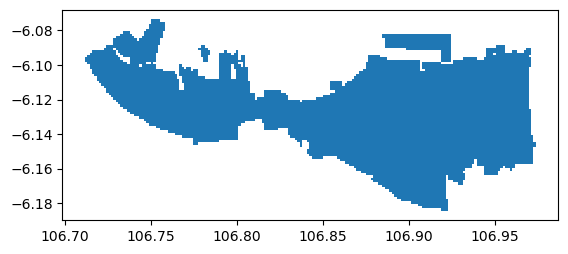

In [ ]:
JakUt_poly.plot()

In [ ]:
JakUt_true_area.plot()

<AxesSubplot: >

In [ ]:
JakUt_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
clipped = j_pop.rio.clip(JakUt_poly.geometry.values, JakUt_poly.crs)

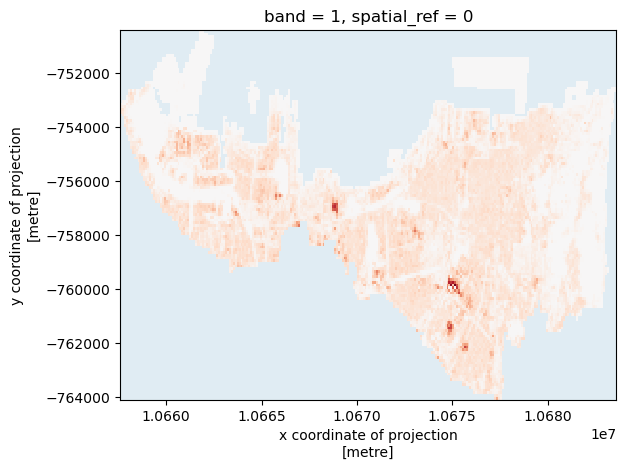

In [ ]:
clipped.plot(add_colorbar=False)

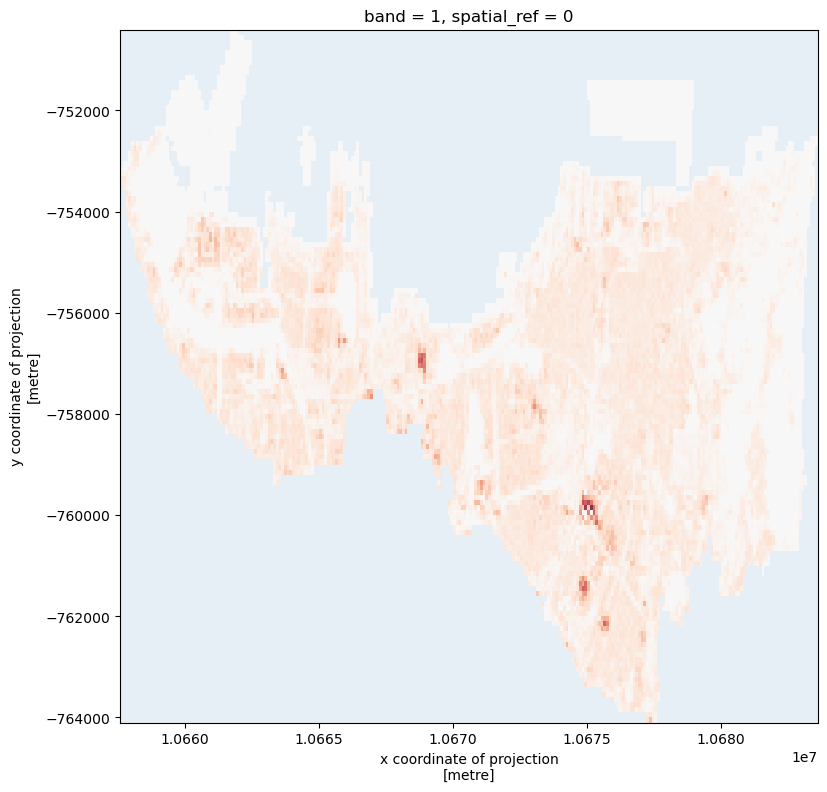

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt
# plt.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# plt.switch_backend('Agg')

fig, ax = plt.subplots(figsize=(9, 9))
clipped.plot(alpha=0.8, ax=ax, add_colorbar=False)

# sm = plt.cm.ScalarMappable()
# sm.set_array(p_dense['population'])
# cbar = fig.colorbar(clipped, ax=ax, aspect=50, pad=0.05, orientation='horizontal')

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=JakUt_poly.crs)
# Set the LaTeX font and other options (optional)

# Save the plot as a PGF file
# plt.savefig('plot_population_full.pdf')


plt.show()

In [ ]:
#TRUE DEFINITION OF POPDENSE

from rasterstats import zonal_stats
import pandas

elevations2 = zonal_stats(
    JakUt_true_area.to_crs(clipped.rio.crs),  # Geotable with zones
    p,  # Path to surface file
)
elevations2 = pandas.DataFrame(elevations2)

In [ ]:
elevations2

,min,max,mean,count
0,69.114128,105.534683,87.324406,2
1,242.088150,250.066940,246.077545,2
2,4.027726,38.508129,21.267928,2
3,11.770632,106.136185,45.722259,3
4,182.527344,236.409241,209.468292,2
...,...,...,...,...
7082,0.767381,18.701605,9.734493,2
7083,11.695946,11.695946,11.695946,1
7084,0.000000,0.086000,0.043000,2
7085,12.026491,67.708366,37.781706,4


In [ ]:
JakUt_true_dense = JakUt_true_area.assign(  # Append elevation values to tracts
    elevation=elevations2["mean"]
)

In [ ]:
JakUt_true_dense['pop_area_normal'] = JakUt_true_dense['elevation']/JakUt_true_dense.iloc[0].area

In [ ]:
JakUt_true_dense

,geometry,quadkey,id,area,shelter factor,height,elevation,pop_area_normal
0,"POLYGON ((11879231.440 -679983.804, 11879231.4...",310012111312023223,0,290.899650,0.25,0.0,87.324406,0.300187
1,"POLYGON ((11879231.440 -680136.678, 11879231.4...",310012111312201001,1,260.678059,0.25,0.0,246.077545,0.845919
2,"POLYGON ((11879384.314 -679830.930, 11879384.3...",310012111312023230,2,0.000000,0.00,0.0,21.267928,0.073111
3,"POLYGON ((11879384.314 -679983.804, 11879384.3...",310012111312023232,3,2007.071476,0.25,0.0,45.722259,0.157175
4,"POLYGON ((11879384.314 -680136.678, 11879384.3...",310012111312201010,4,4907.412662,0.25,0.0,209.468292,0.720071
...,...,...,...,...,...,...,...,...
7082,"POLYGON ((11908124.637 -686404.514, 11908124.6...",310013000221002112,7082,0.000000,0.00,0.0,9.734493,0.033463
7083,"POLYGON ((11908124.637 -686557.388, 11908124.6...",310013000221002130,7083,0.000000,0.00,0.0,11.695946,0.040206
7084,"POLYGON ((11908124.637 -686710.262, 11908124.6...",310013000221002132,7084,0.000000,0.00,0.0,0.043000,0.000148
7085,"POLYGON ((11908277.511 -685487.270, 11908277.5...",310013000221000133,7085,391.694238,0.25,0.0,37.781706,0.129879


In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.switch_backend('pgf')

JakUt_true_dense.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
JakUt_true_dense.plot(column='pop_area_normal', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(JakUt_true_dense['pop_area_normal'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal', label="$people/m^2$")

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=JakUt_true_dense.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file
plt.savefig('plot_population_true.pdf')


plt.show()

C:\Users\MICKO\AppData\Local\Temp\ipykernel_9376\2939058460.py:28: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Ballistic

In [3]:
import numpy as np

def ballistic_model(n_sampling, ac_profile):
    sample_points = np.random.normal(15, 3, size=(n_sampling))
    mass = ac_profile['mass']
    g = ac_profile['g']
    cd = ac_profile['cd']
    flight_lv = ac_profile['flight_lv']
    
    gamma = np.sqrt(mass*g/cd)
    log2 = np.log(2)
    cd_z = cd*flight_lv
    m_per_c = mass/cd
    m_gamma = mass*gamma
    
    #Warning! Mathematically untested
    def ballistic(v_sample):
        point_list = []
        for v in v_sample:
            angle_degree = np.radians(np.random.uniform(0,360))
            ballistic_x = m_per_c*np.log(1+(v*((mass*log2+cd_z)/(m_gamma))))
            ballistic_y = m_per_c*np.log(1+(v*((mass*log2+cd_z)/(m_gamma))))
            
            # t_drop = (mass*log2+c*ballistic_y*gamma)/(mass*g)
            # V_FINAL = np.linalg.norm([v, v])
            E_imp = 1/2*mass*v**2
            
            radial_ballistic_func_x = lambda angle :ballistic_x*np.cos(angle)
            radial_ballistic_func_y = lambda angle :ballistic_y*np.sin(angle)
            x_point = radial_ballistic_func_x(angle_degree)
            y_point = radial_ballistic_func_y(angle_degree)
            point_list.append((x_point,y_point, v))
        return (np.array(point_list))

    crash_point = ballistic(sample_points)
    crash_point = np.column_stack((crash_point))
    return(crash_point)

In [51]:
point = ballistic_model(5, drone_profile )

In [52]:
point.shape

(3, 5)

In [53]:
point

array([[ 91.94773097,  69.95323703, -95.84106376,  47.47015083,
         23.43434092],
       [ 25.10622131, -71.93929902,  27.59046399, -87.71633877,
         97.16274965],
       [ 14.59297411,  16.40676361,  16.17705859,  16.17861337,
         16.25792414]])

In [6]:
from upt.riskcalculator.model_area_exp import AreaExpose as ae

drone_profile={
    'mass': 1,
    'g': 9.81,
    'cd': 0.02,
    'cl': 0,
    'flight_lv': 400,
    'diagonal size':0.30,
    'glide angle':12
    }

calc = ae(p_dense, drone_profile)
z = calc.run_function()

In [7]:
z

,geometry,quadkey,id,area,shelter factor,no fly zone,height,population,pre fatality,impact score,fly level score
0,"POLYGON ((11880148.684 -679983.804, 11880148.6...",310012111312023,0,63544.754190,0.25,0.0,0.0,0.002250,0.658717,0.015021,0
1,"POLYGON ((11880148.684 -681206.796, 11880148.6...",310012111312201,1,172568.805239,0.25,0.0,0.0,0.002250,0.658717,0.015021,0
2,"POLYGON ((11880148.684 -682429.789, 11880148.6...",310012111312203,2,7929.587671,0.25,0.0,0.0,0.002423,0.658717,0.016177,0
3,"POLYGON ((11881371.677 -678760.811, 11881371.6...",310012111312030,3,0.000000,0.00,0.0,0.0,0.002408,0.857493,0.016072,0
4,"POLYGON ((11881371.677 -679983.804, 11881371.6...",310012111312032,4,70780.829075,0.25,0.0,0.0,0.002219,0.658717,0.014811,0
...,...,...,...,...,...,...,...,...,...,...,...
149,"POLYGON ((11908277.511 -682429.789, 11908277.5...",310013000203202,149,42993.163867,0.25,0.0,0.0,0.002408,0.658717,0.016072,0
150,"POLYGON ((11908277.511 -683652.781, 11908277.5...",310013000203220,150,9709.241292,0.25,0.0,0.0,0.002235,0.658717,0.014916,0
151,"POLYGON ((11908277.511 -684875.773, 11908277.5...",310013000203222,151,47059.200494,0.25,0.0,0.0,0.002392,0.658717,0.015967,0
152,"POLYGON ((11908277.511 -686098.766, 11908277.5...",310013000221000,152,17699.788349,0.25,0.0,0.0,0.002235,0.658717,0.014916,0


In [8]:
ren = calc.sum_descent(drone_profile)

Running Ballistic Model


C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)


Running Glide Model
Running Parachute Model
Running flyaway_mask Model


In [9]:
zil = calc.applied_descent()
zel = calc.total_risk_score()

In [10]:
zel['fly level score'].unique()

array([1.])

In [14]:
zil.plot()

,geometry,quadkey,id,area,shelter factor,no fly zone,height,population,pre fatality,impact score,fly level score,fatality risk total
0,"POLYGON ((11880148.684 -679983.804, 11880148.6...",310012111312023,0,63544.754190,0.25,0.0,0.0,0.002250,0.658717,0.015021,0,0.020763
1,"POLYGON ((11880148.684 -681206.796, 11880148.6...",310012111312201,1,172568.805239,0.25,0.0,0.0,0.002250,0.658717,0.015021,0,0.020763
2,"POLYGON ((11880148.684 -682429.789, 11880148.6...",310012111312203,2,7929.587671,0.25,0.0,0.0,0.002423,0.658717,0.016177,0,0.020763
3,"POLYGON ((11881371.677 -678760.811, 11881371.6...",310012111312030,3,0.000000,0.00,0.0,0.0,0.002408,0.857493,0.016072,0,0.021534
4,"POLYGON ((11881371.677 -679983.804, 11881371.6...",310012111312032,4,70780.829075,0.25,0.0,0.0,0.002219,0.658717,0.014811,0,0.020763
...,...,...,...,...,...,...,...,...,...,...,...,...
149,"POLYGON ((11908277.511 -682429.789, 11908277.5...",310013000203202,149,42993.163867,0.25,0.0,0.0,0.002408,0.658717,0.016072,0,0.020763
150,"POLYGON ((11908277.511 -683652.781, 11908277.5...",310013000203220,150,9709.241292,0.25,0.0,0.0,0.002235,0.658717,0.014916,0,0.020763
151,"POLYGON ((11908277.511 -684875.773, 11908277.5...",310013000203222,151,47059.200494,0.25,0.0,0.0,0.002392,0.658717,0.015967,0,0.020763
152,"POLYGON ((11908277.511 -686098.766, 11908277.5...",310013000221000,152,17699.788349,0.25,0.0,0.0,0.002235,0.658717,0.014916,0,0.020763


In [21]:
zel['total risk'].unique()

array([ 0., nan])

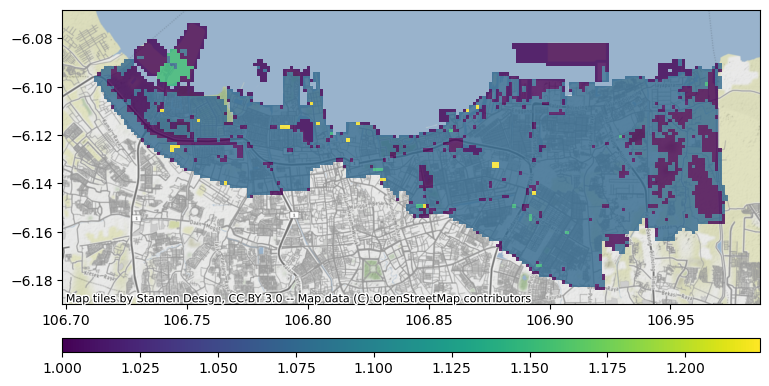

In [8]:
import contextily as ctx
import matplotlib.pyplot as plt

z.to_crs("EPSG:4326",inplace=True)
fig, ax = plt.subplots(figsize=(9, 9))
z.plot(column='pre fatality', alpha=0.8, ax=ax)

sm = plt.cm.ScalarMappable()
sm.set_array(z['pre fatality'])
cbar = fig.colorbar(sm, ax=ax, aspect=50, pad=0.05, orientation='horizontal')

# Add basemap tiles using contextily
ctx.add_basemap(ax, crs=z.crs, )
# Set the LaTeX font and other options (optional)


# Save the plot as a PGF file


plt.show()

In [16]:
from upt.riskcalculator.sjoin_mask import sjoin_mask

,N_points,E_imp,geometry
0,0.0000,0.0,POINT (-118.61317 -118.61317)
1,0.0001,1.0,POINT (-118.61317 -92.48244)
2,0.0046,46.0,POINT (-118.61317 -66.35172)
3,0.0206,206.0,POINT (-118.61317 -40.22099)
4,0.0256,256.0,POINT (-118.61317 -14.09027)
...,...,...,...
76,0.0331,331.0,POINT (90.43263 -14.09027)
77,0.0279,279.0,POINT (90.43263 12.04046)
78,0.0095,95.0,POINT (90.43263 38.17118)
79,0.0000,0.0,POINT (90.43263 64.30191)


In [ ]:
import geopandas as gpd
import concurrent.futures
import numpy as np

def sjoin_mask(array_index, mask, gdf):
    def sjoin_risk_sum(array_index):
        mask_translate = mask.copy()
        mask_translate['geometry'] = mask.translate(gdf.iloc[array_index][0].centroid.x,gdf.iloc[array_index][0].centroid.y)
        sjoin_gp = gpd.sjoin(gdf, mask_translate)
        impact_exponent = sjoin_gp['E_imp'],sjoin_gp['shelter factor']                        
        fatality = 1/(1+(sjoin_gp['pre fatality'].multiply(impact_exponent)))
        risk = sjoin_gp['N_points'].multiply(fatality).sum()
        # risk = sjoin_gp[attr_columns].prod().sum()
        return(risk)
    
    result_list = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(sjoin_risk_sum, array_index)
    
        for result in results:
            result_list.append(result)
    
    # result_df = gdf.copy()
    # result_df['risk'] = result_list
    # return(result_df)
    return(result_list)



